In [1]:
import numpy as np
from matplotlib import pyplot

## Objective Function

$$f(x)=x^2$$

In [2]:
def objective_function(x):
    return x[0]**2.0
# Observation: type(x) == numpy.array

### Visualization with MatplotLib

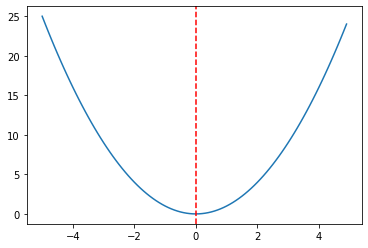

In [3]:
# Observation Interval for Input
r_min, r_max = -5.0, 5.0

# Uniform Sampling for Input's Observation Interval, with steps of 0.1 
inputs = np.arange(r_min, r_max, 0.1)

# Objective Functions' Values
results = [objective_function([x]) for x in inputs]
 
pyplot.plot(inputs, results)

# Global Best Point
x_optima = 0.0
pyplot.axvline(x=x_optima, ls='--', color='red');

# FIRST-CHOICE HILL CLIMBING

In [4]:
def first_choice_hill_climbing_with_scores(objective_function, bounds, n_iterations, step_size):
    current = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])    # Generation of a Random Starting State
# Observations:
    # - bounds[:, 0] -> Lower Bound of the imposed observation interval: "5" for the default execution.
    # - np.random.rand(n) -> creates an array of the given shape and populates it with random samples from a Uniform Distribution over [0,1).
    # - (bounds[:, 1] - bounds[:, 0]) -> Dimension of the imposed observation interval -> "10" for the default execution.
    # - type(current) == numpy.ndarray
    # - current.shape == (1,)

# Starting State Evalutation
    current_eval = objective_function(current)

# Scores Memory
    scores = list()
    scores.append(current_eval)

# Hill Climbing execution
    for i in range(n_iterations):
        next = current + np.random.randn(len(bounds)) * step_size   # Generation of a Random Next State
# Observations:
    # - len(bounds) == 1
    # - np.random.randn(d0, d1, ..., dn) -> returns an array of the given shape and populated with samples from a Standard Normal Distribution
    # - step_size -> Standard Normal Distribution's Standard Deviation

# Next State Evalutation
        next_eval = objective_function(next)

        if next_eval <= current_eval:
            print("Improvement Found at Iteration %d!" % (i+1))
            print("Old State: f(%s) = %.5f" %(current, current_eval))
            print("New State: f(%s) = %.5f\n" %(next, next_eval))
            
            current = next
            current_eval = next_eval
            scores.append(current_eval)
    
    print("*** END OF THE SEARCH! ***")
    return scores

In [5]:
# Parameters Setting
np.random.seed(5)
bounds = np.asarray([[-5.0, 5.0]])
n_iterations = 1000
step_size = 0.1

# CODE'S TEST SECTION

In [6]:
scores = first_choice_hill_climbing_with_scores(objective_function, bounds, n_iterations, step_size)

Improvement Found at Iteration 2!
Old State: f([-2.78006829]) = 7.72878
New State: f([-2.74290923]) = 7.52355

Improvement Found at Iteration 4!
Old State: f([-2.74290923]) = 7.52355
New State: f([-2.65873147]) = 7.06885

Improvement Found at Iteration 5!
Old State: f([-2.65873147]) = 7.06885
New State: f([-2.52197291]) = 6.36035

Improvement Found at Iteration 6!
Old State: f([-2.52197291]) = 6.36035
New State: f([-2.46450214]) = 6.07377

Improvement Found at Iteration 8!
Old State: f([-2.46450214]) = 6.07377
New State: f([-2.44740961]) = 5.98981

Improvement Found at Iteration 10!
Old State: f([-2.44740961]) = 5.98981
New State: f([-2.28364676]) = 5.21504

Improvement Found at Iteration 13!
Old State: f([-2.28364676]) = 5.21504
New State: f([-2.19245939]) = 4.80688

Improvement Found at Iteration 15!
Old State: f([-2.19245939]) = 4.80688
New State: f([-2.01001538]) = 4.04016

Improvement Found at Iteration 16!
Old State: f([-2.01001538]) = 4.04016
New State: f([-1.86425287]) = 3.4754

### Scores Plot with MatplotLib

Text(0, 0.5, "Evalutation Function's Value")

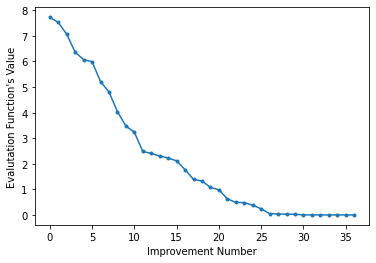

In [7]:
pyplot.plot(scores, '.-')
pyplot.xlabel("Improvement Number")
pyplot.ylabel("Evalutation Function's Value")